# Analysis of Mental Health and Remote Work Factors
This notebook explores the dataset on remote work and mental health. The goal is to visualize the relationship between mental health and various factors like workload, social support, and work-life balance. 

## Steps:
1. Load and preprocess the data.
2. Create 18 visualizations (mental health vs. factors).
3. Save visualizations as PNG files.

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import os

# Set the style and context for better aesthetics
sns.set_theme(style="ticks")
sns.set_context("talk", font_scale=1.1)

In [2]:
# Load the dataset
file_path = 'Impact_of_Remote_Work_on_Mental_Health.csv'
df = pd.read_csv(file_path)

# Display the first few rows to verify the data
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [3]:
# Step 1: Drop irrelevant columns
if 'Employee_ID' in df.columns:
    df = df.drop(columns=['Employee_ID'])

# Step 2: Fill missing values
# Mental_Health_Condition: Fill missing with 'No Issues' and map to numerical values
df['Mental_Health_Condition'] = df['Mental_Health_Condition'].fillna('No Issues')
mental_health_mapping = {
    'No Issues': 0,   # No mental health issues
    'Anxiety': 1,     # Moderate
    'Burnout': 2,     # Bad
    'Depression': 3   # Very bad
}
df['Mental_Health_Condition'] = df['Mental_Health_Condition'].map(mental_health_mapping)

# Stress_Level: Replace missing values with 'Unknown'
if 'Stress_Level' in df.columns:
    df['Stress_Level'] = df['Stress_Level'].fillna('Unknown')

# Sleep_Quality: Replace missing values with 'Unknown'
if 'Sleep_Quality' in df.columns:
    df['Sleep_Quality'] = df['Sleep_Quality'].fillna('Unknown')

# Physical_Activity: Replace missing values with 'Unknown'
if 'Physical_Activity' in df.columns:
    df['Physical_Activity'] = df['Physical_Activity'].fillna('Unknown')

# Step 3: Verify the dataset
print("Processed dataset info:")
print(df.info())

# Preview the dataset
print("\nPreview of processed dataset:")
df.head()

Processed dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                5000 non-null   int64 
 1   Gender                             5000 non-null   object
 2   Job_Role                           5000 non-null   object
 3   Industry                           5000 non-null   object
 4   Years_of_Experience                5000 non-null   int64 
 5   Work_Location                      5000 non-null   object
 6   Hours_Worked_Per_Week              5000 non-null   int64 
 7   Number_of_Virtual_Meetings         5000 non-null   int64 
 8   Work_Life_Balance_Rating           5000 non-null   int64 
 9   Stress_Level                       5000 non-null   object
 10  Mental_Health_Condition            5000 non-null   int64 
 11  Access_to_Mental_Health_Resources  5000 non-n

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,3,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,1,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,1,No,No Change,4,Unsatisfied,5,Unknown,Poor,North America
3,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,3,Yes,Increase,3,Unsatisfied,3,Unknown,Poor,Europe
4,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,0,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [4]:
# Group numerical columns into categories
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])
df['Experience_Group'] = pd.cut(df['Years_of_Experience'], bins=[0, 5, 10, 20, 50], labels=['0-5', '6-10', '11-20', '21+'])
df['Work_Hours_Group'] = pd.cut(df['Hours_Worked_Per_Week'], bins=[0, 20, 40, 80], labels=['0-20', '21-40', '41+'])
df['Meetings_Group'] = pd.cut(df['Number_of_Virtual_Meetings'],bins=[-0.1, 3, 6, 9, 12, 15], labels=['0-3', '4-6', '7-9', '10-12', '13-15'])

# Verify grouping results
# print("Age grouping sample:")
# print(df[['Age', 'Age_Group']].head())

# print("Experience grouping sample:")
# print(df[['Years_of_Experience', 'Experience_Group']].head())

# print("Work hours grouping sample:")
# print(df[['Hours_Worked_Per_Week', 'Work_Hours_Group']].head())

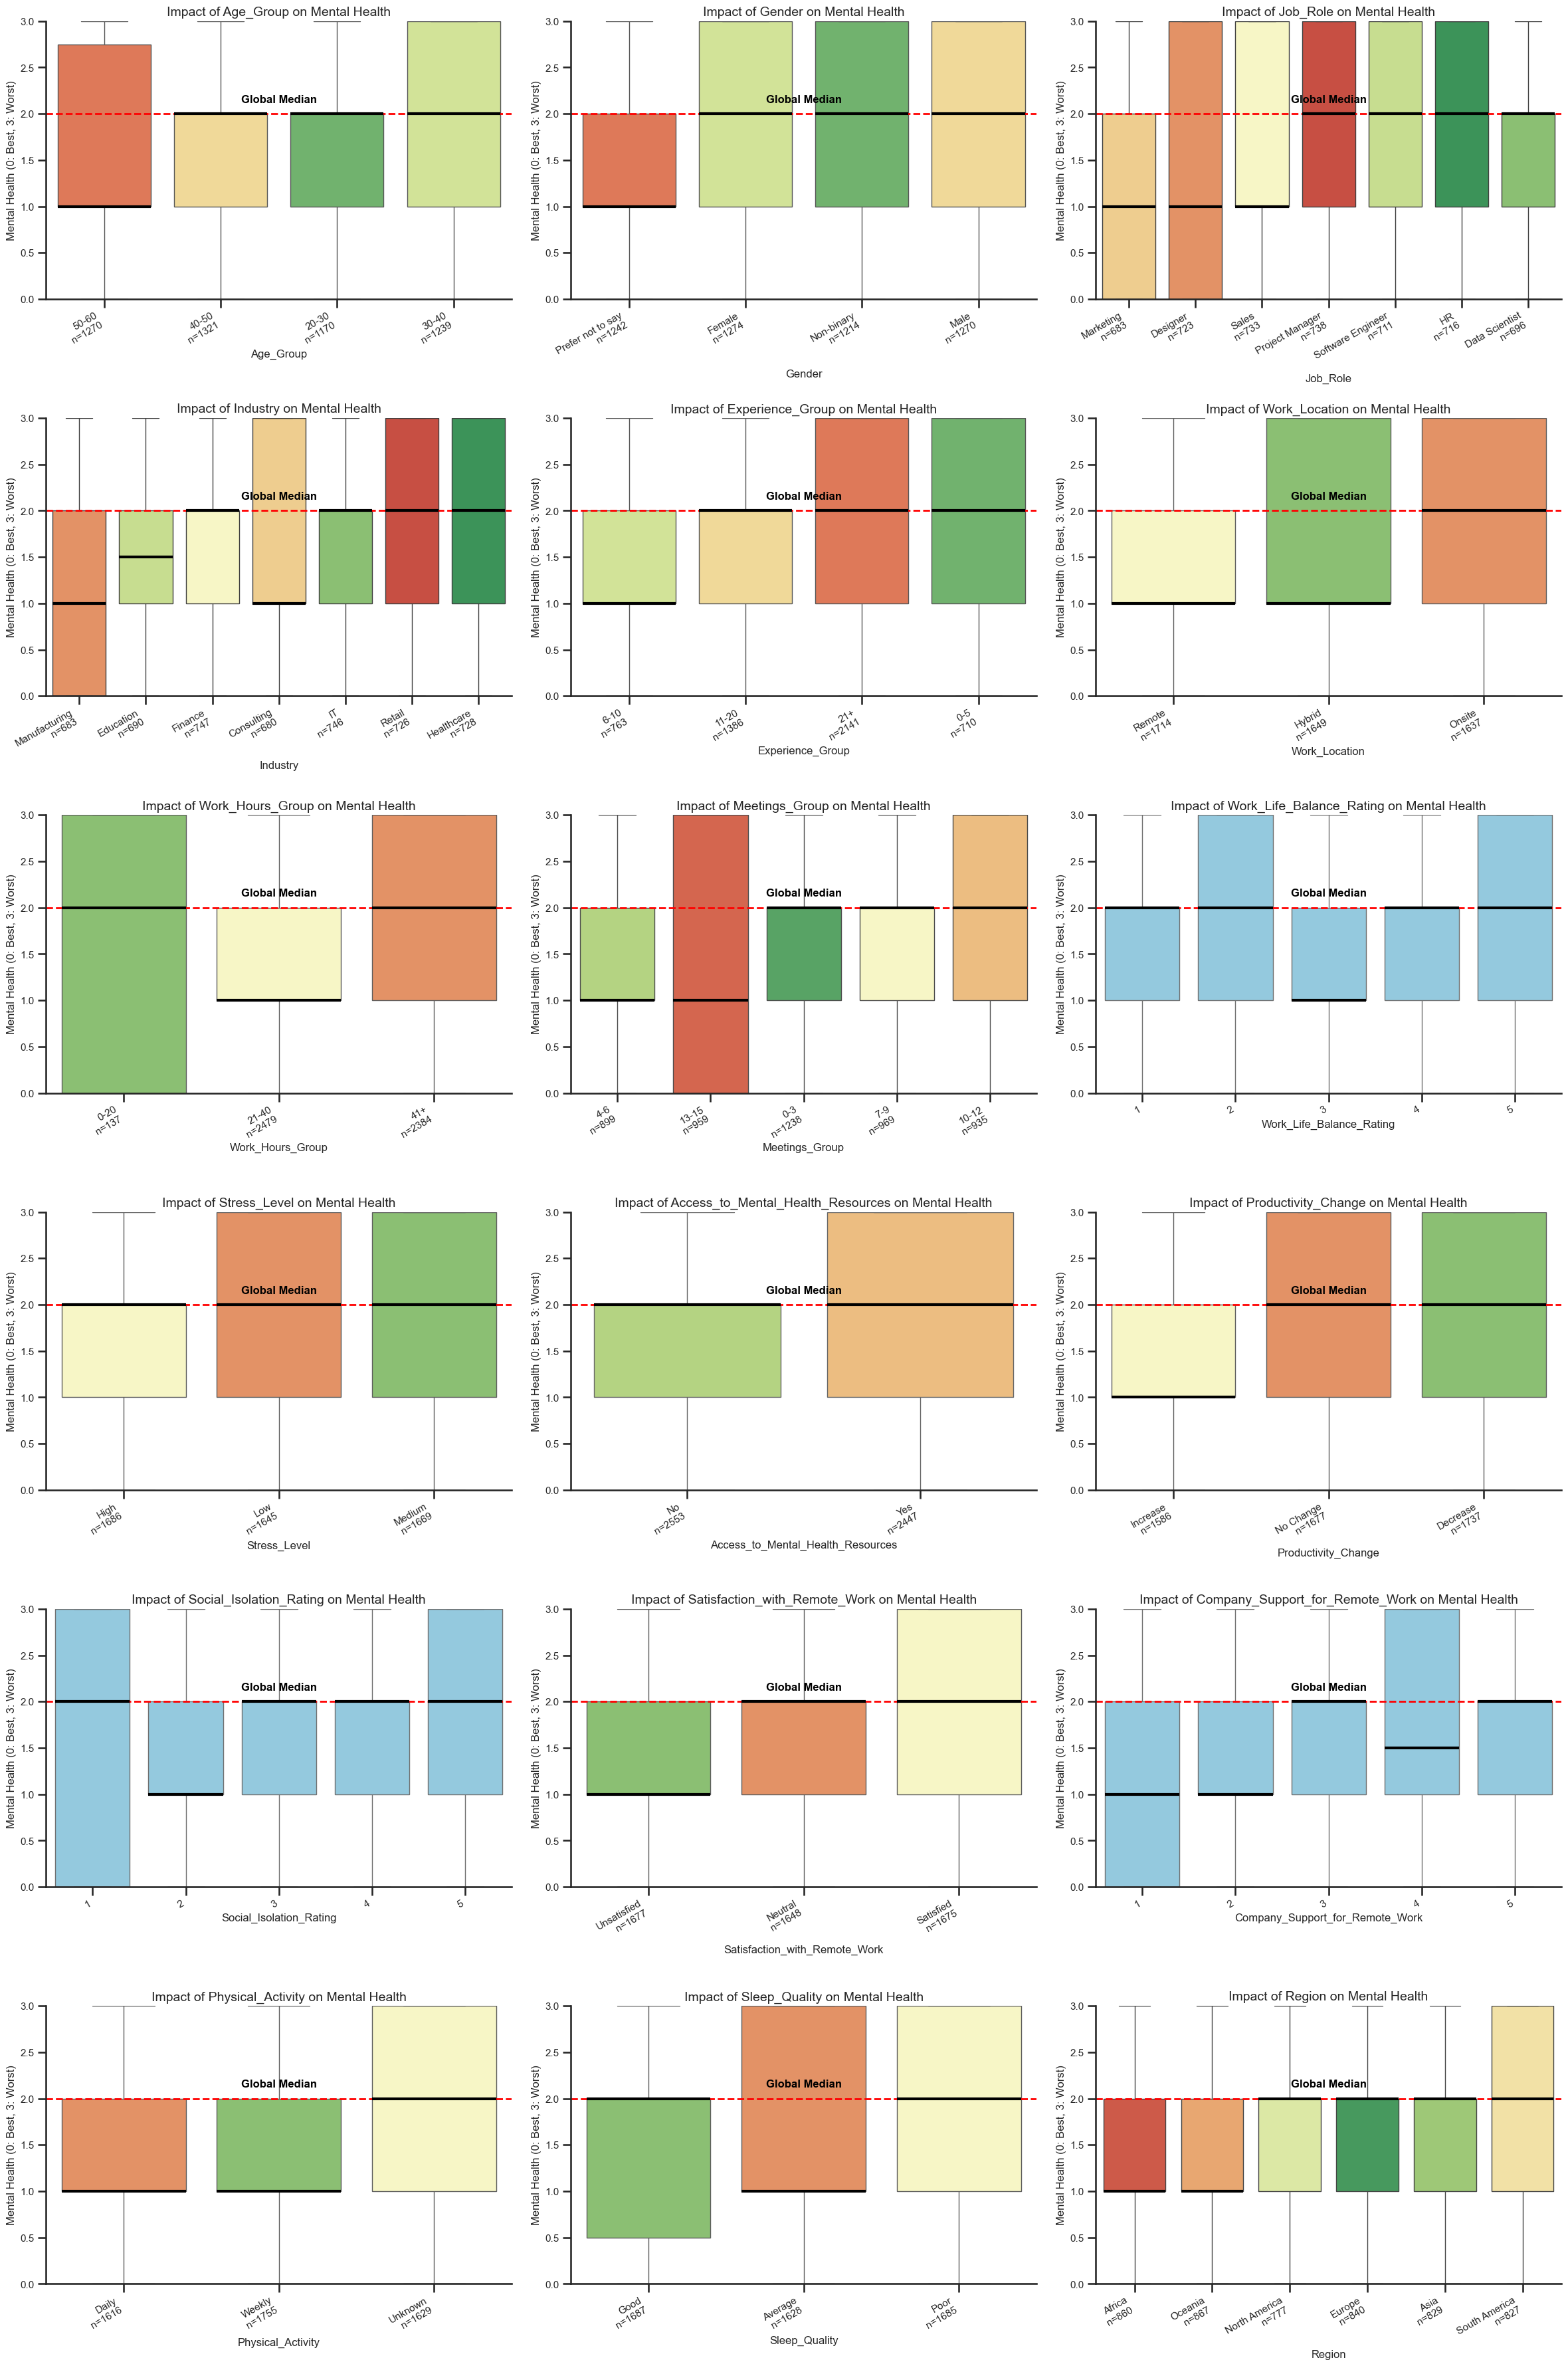

In [5]:
factors = [
    'Age_Group', 'Gender', 'Job_Role', 'Industry', 'Experience_Group',
    'Work_Location', 'Work_Hours_Group', 'Meetings_Group',
    'Work_Life_Balance_Rating', 'Stress_Level', 'Access_to_Mental_Health_Resources',
    'Productivity_Change', 'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
    'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality', 'Region'
]

cols = 3
rows = math.ceil(len(factors) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(24, 6*rows))
axes = axes.flatten()

# Compute the overall median for the entire dataset
overall_median = df['Mental_Health_Condition'].median()

for i, factor in enumerate(factors):
    ax = axes[i]
    
    # Check if factor is categorical
    if df[factor].dtype == 'object' or isinstance(df[factor].dtype, pd.CategoricalDtype):
        # Order categories by mean Mental_Health_Condition
        factor_means = df.groupby(factor, observed=False)['Mental_Health_Condition'].mean().sort_values()
        order = factor_means.index
        
        # Create a gradient palette from green (best) to red (worst)
        n_cats = len(order)
        colors = sns.color_palette("RdYlGn_r", n_colors=n_cats)

        # Plot boxplot with hue=factor and dodge=False to allow multiple colors per category
        sns.boxplot(
            x=factor, y='Mental_Health_Condition', data=df, ax=ax, order=order,
            hue=factor, dodge=False, palette=colors, showmeans=False, meanline=False,
            medianprops={'color': 'black', 'linewidth': 3}
        )
        
        # Remove the redundant legend
        if ax.legend_:
            ax.legend_.remove()

        # Get counts for each category
        counts = df[factor].value_counts()

        # Update x-tick labels to show category name and n count on separate lines
        new_labels = []
        for cat in order:
            cat_count = counts.get(cat, 0)
            # Two-line label: first line is category, second line is 'n=...'
            new_labels.append(f"{cat}\nn={cat_count}")
        
        # Explicitly set x-ticks and then their labels
        ax.set_xticks(range(len(order)))
        ax.set_xticklabels(new_labels)

    else:
        # Numeric factor: just one category or numeric bins
        sns.boxplot(
            x=factor, y='Mental_Health_Condition', data=df, ax=ax,
            color="skyblue", showmeans=False, meanline=False,
            medianprops={'color': 'black', 'linewidth': 3}
        )
        
        # If numeric factor is categorized (e.g., via pd.cut), we can do a similar step:
        if isinstance(df[factor].dtype, pd.CategoricalDtype):
            order = df[factor].cat.categories
            counts = df[factor].value_counts()

            new_labels = []
            for cat in order:
                cat_count = counts.get(cat, 0)
                new_labels.append(f"{cat}\nn={cat_count}")
            
            # Explicitly set x-ticks and then their labels
            ax.set_xticks(range(len(order)))
            ax.set_xticklabels(new_labels)

    # Add a global median line (red dashed)
    ax.axhline(overall_median, color='red', linestyle='--', linewidth=2)
    
    # Annotate the global median line
    ax.text(0.5, overall_median+0.1, 'Global Median', color='black', ha='center', va='bottom', 
            fontsize=12, fontweight='bold', transform=ax.get_yaxis_transform())
    
    # Set titles and labels
    ax.set_title(f'Impact of {factor} on Mental Health', fontsize=14)
    ax.set_xlabel(factor, fontsize=12)
    ax.set_ylabel('Mental Health (0: Best, 3: Worst)', fontsize=12)

    # Rotate x-tick labels slightly (30 degrees) to ensure readability
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

    # Adjust the Y-axis ticks
    ax.set_yticks(np.arange(0, 3.1, 0.5))
    ax.set_ylim(0, 3)

    # Decrease tick label size
    ax.tick_params(axis='both', labelsize=11)

# Hide extra subplots if any
for j in range(len(factors), rows*cols):
    axes[j].set_visible(False)

# Remove top and right spines for a cleaner look
sns.despine()

plt.tight_layout()

# Save the figure in high resolution
output_dir = "visualizations"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, "all_factors_mental_health.png"), dpi=300)
plt.show()